In [4]:
!sudo apt-get install libcgal-dev cmake
!pip3 install forwardable imageio Cython cached-property wheel
!pip3 install ripser
!pip3 install homcloud
!pip3 install pandas
!python3 -m homcloud.self_check --no-dipha --no-paraview
import homcloud.interface as hc  # HomCloudのインターフェス
import homcloud.plotly_3d as p3d  # 3次元可視化用

import plotly.graph_objects as go  # これも3次元可視化用
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gtda.time_series import TakensEmbedding

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcgal-dev is already the newest version (4.11-2build1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
You might want to run 'apt --fix-broken install' to correct these.
The following packages have unmet dependencies:
 linux-headers-5.4.0-1104-gcp : Depends: linux-gcp-5.4-headers-5.4.0-1104 but it is not going to be installed
E: Unmet dependencies. Try 'apt --fix-broken install' with no packages (or specify a solution).
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] 

In [2]:
r=np.load("rwkv-test.npy")
r[0].shape

(409600,)

In [3]:
r.shape

(10, 409600)

In [35]:
from scipy import spatial
def cos_sim(a, b):
    return 1 - spatial.distance.cosine(a, b)


#target_vec=vec_list[0]
#target_vec=vec_list[4]
target_vec=r[9]

cos_sim_list=[cos_sim(target_vec,i) for i in r]

for i in np.argsort(cos_sim_list)[::-1]:

    #print("{:.3f}".format(cos_sim_list[i]),text_list[i][0:60])
    print("{:.3f}".format(cos_sim_list[i]))


1.000
0.861
0.860
0.853
0.840
0.834
0.834
0.829
0.785
0.779


In [36]:
embedder = TakensEmbedding(
    time_delay=1,
    dimension=3,
    stride=1,
)
embedded1 = np.array(embedder.fit_transform([r[0]])).reshape((-1, 3))
embedded1.shape

(409598, 3)

In [37]:
samplecols = np.random.choice(embedded1.shape[0], size=1000)

go.Figure(

    data=[p3d.PointCloud(embedded[samplecols, :], color="black")],
    layout=dict(scene=dict(xaxis=dict(visible=False), yaxis=dict(visible=False), zaxis=dict(visible=False)))
)



In [18]:
hc.PDList.from_alpha_filtration(embedded, 
                                save_to="pointcloud.pdgm",
                                save_boundary_map=True)

PDList(path=pointcloud.pdgm)

In [19]:


pdlist = hc.PDList("pointcloud.pdgm")



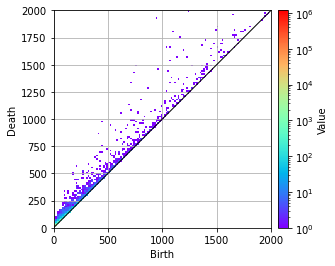

In [29]:
pd1 = pdlist.dth_diagram(1)
pd1.histogram((0, 2000)).plot(colorbar={"type": "log"})


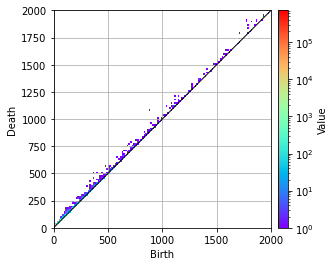

In [31]:


pd2 = pdlist.dth_diagram(2)
pd2.histogram((0, 2000)).plot(colorbar={"type": "log"})


In [39]:
embedder = TakensEmbedding(
    time_delay=1,
    dimension=3,
    stride=1,
)
embedded2 = np.array(embedder.fit_transform([r[9]])).reshape((-1, 3))
embedded2.shape

(409598, 3)

In [40]:
samplecols = np.random.choice(embedded2.shape[0], size=1000)

go.Figure(

    data=[p3d.PointCloud(embedded[samplecols, :], color="black")],
    layout=dict(scene=dict(xaxis=dict(visible=False), yaxis=dict(visible=False), zaxis=dict(visible=False)))
)


In [42]:
hc.PDList.from_alpha_filtration(embedded2, 
                                save_to="pointcloud2.pdgm",
                                save_boundary_map=True)

PDList(path=pointcloud2.pdgm)